In [152]:
import pandas as pd

df = pd.read_csv("LOCAL_PEOPLE_GU_2022.csv",encoding='cp949')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준일ID            219000 non-null  int64  
 1   시간대구분            219000 non-null  int64  
 2   자치구코드            219000 non-null  int64  
 3   총생활인구수           219000 non-null  float64
 4   남자0세부터9세생활인구수    219000 non-null  float64
 5   남자10세부터14세생활인구수  219000 non-null  float64
 6   남자15세부터19세생활인구수  219000 non-null  float64
 7   남자20세부터24세생활인구수  219000 non-null  float64
 8   남자25세부터29세생활인구수  219000 non-null  float64
 9   남자30세부터34세생활인구수  219000 non-null  float64
 10  남자35세부터39세생활인구수  219000 non-null  float64
 11  남자40세부터44세생활인구수  219000 non-null  float64
 12  남자45세부터49세생활인구수  219000 non-null  float64
 13  남자50세부터54세생활인구수  219000 non-null  float64
 14  남자55세부터59세생활인구수  219000 non-null  float64
 15  남자60세부터64세생활인구수  219000 non-null  float64
 16  남자65세부터69세생활인구수  219000 non-null  floa

In [153]:
df2 = df[df['기준일ID'] == 20220731]
df2 = df2.iloc[:, 0:4]
df2

,기준일ID,시간대구분,자치구코드,총생활인구수
126600,20220731,0,11110,203268.1910
126601,20220731,0,11140,165950.3174
126602,20220731,0,11170,266191.8167
126603,20220731,0,11200,302358.6775
126604,20220731,0,11215,348959.0123
...,...,...,...,...
127195,20220731,23,11620,490867.0350
127196,20220731,23,11650,453658.8504
127197,20220731,23,11680,638619.6200
127198,20220731,23,11710,719488.9921


In [154]:
df3 = df2[df2['시간대구분'] == 14]
df3['자치구코드'] = df3['자치구코드'].astype(str)
df3

/var/folders/pt/xk6c0b5907z_9txgpjnm7d000000gn/T/ipykernel_92211/1831202265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['자치구코드'] = df3['자치구코드'].astype(str)


,기준일ID,시간대구분,자치구코드,총생활인구수
126950,20220731,14,11110,275814.6153
126951,20220731,14,11140,224479.4484
126952,20220731,14,11170,296164.9995
126953,20220731,14,11200,306594.9709
126954,20220731,14,11215,335100.2174
126955,20220731,14,11230,317339.7987
126956,20220731,14,11260,334882.3550
126957,20220731,14,11290,380084.6415
126958,20220731,14,11305,275546.3192
126959,20220731,14,11320,260685.5632


In [155]:
import csv

# CSV 파일 경로
csv_file_path = '행정동코드_매핑정보_20200325.csv'

# 딕셔너리 형태로 데이터 읽기
# data_list = []
data_dict={}
with open(csv_file_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if 'RESD_DO_NM' in row and row['RESD_DO_NM']=='서울':
            del row['RESD_DO_NM']
            del row['']
            row['지역코드'] = row['\ufeffRESD_CD']
            del row['\ufeffRESD_CD']
            row['구'] = row['RESC_CT_NM']
            del row['RESC_CT_NM']

            if '지역코드' in row and '구' in row:
                code=row['지역코드']
                gu = row['구']
                data_dict[code] = gu
            # data_list.append(row)

# data_list에는 딕셔너리 형태의 데이터가 리스트로 저장되며, 직업 열이 제거됨
# data_list

print(data_dict)
stations = data_dict


{'11110': '종로구', '11140': '중구', '11170': '용산구', '11200': '성동구', '11215': '광진구', '11230': '동대문구', '11260': '중랑구', '11290': '성북구', '11305': '강북구', '11320': '도봉구', '11350': '노원구', '11380': '은평구', '11410': '서대문구', '11440': '마포구', '11470': '양천구', '11500': '강서구', '11530': '구로구', '11545': '금천구', '11560': '영등포구', '11590': '동작구', '11620': '관악구', '11650': '서초구', '11680': '강남구', '11710': '송파구', '11740': '강동구'}


In [194]:
import geopandas as gpd

geo = gpd.read_file('TL_SCCO_SIG.json', encoding='cp949')
geo

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.60473 38.07265, 127.60776 38.071..."
1,42130,Wonju-si,원주시,"POLYGON ((128.10856 37.29880, 128.10879 37.297..."
2,42150,Gangneung-si,강릉시,"POLYGON ((129.04785 37.64961, 129.07405 37.604..."
3,42170,Donghae-si,동해시,"POLYGON ((129.15959 37.47574, 129.15821 37.476..."
4,42190,Taebaek-si,태백시,"POLYGON ((129.01210 37.31012, 129.01256 37.308..."
...,...,...,...,...
244,43745,Jeungpyeong-gun,증평군,"POLYGON ((127.57828 36.85376, 127.63754 36.846..."
245,43750,Jincheon-gun,진천군,"POLYGON ((127.44709 37.01087, 127.44709 37.010..."
246,43760,Goesan-gun,괴산군,"POLYGON ((127.81627 36.94109, 127.81714 36.941..."
247,43770,Eumseong-gun,음성군,"POLYGON ((127.63193 37.15393, 127.63196 37.153..."


In [157]:
df_all = None

for station_code, station_name in stations.items():
    # print(station_name)
    if geo['SIG_KOR_NM']=='station_name':
        if df_all is None:
            df_all =  df
        else :
            df_all = pd.concat([df_all, df], ignore_index=True)

df_all

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [158]:
location = stations.keys()
location = list(location)
len(location)

25

In [167]:
cnt=0
cnt_list = []
for x in geo['SIG_CD']:
    if x in location:
        cnt_list.append(cnt)
    cnt+=1

geo_2 = geo.iloc[cnt_list, :].reset_index()
print(geo_2)


    index SIG_CD       SIG_ENG_NM SIG_KOR_NM  \
0     139  11110        Jongno-gu        종로구   
1     140  11140          Jung-gu         중구   
2     141  11170       Yongsan-gu        용산구   
3     142  11200     Seongdong-gu        성동구   
4     143  11215      Gwangjin-gu        광진구   
5     144  11230    Dongdaemun-gu       동대문구   
6     145  11260      Jungnang-gu        중랑구   
7     146  11290      Seongbuk-gu        성북구   
8     147  11305       Gangbuk-gu        강북구   
9     148  11320        Dobong-gu        도봉구   
10    149  11350         Nowon-gu        노원구   
11    150  11380     Eunpyeong-gu        은평구   
12    151  11410     Seodaemun-gu       서대문구   
13    152  11440          Mapo-gu        마포구   
14    153  11470     Yangcheon-gu        양천구   
15    154  11500       Gangseo-gu        강서구   
16    155  11530          Guro-gu        구로구   
17    156  11545     Geumcheon-gu        금천구   
18    157  11560  Yeongdeungpo-gu       영등포구   
19    158  11590       Dongjak-gu       

In [168]:
seo = pd.merge(geo_2, df3, how='inner', left_on='SIG_CD', right_on='자치구코드')
seo

,index,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,기준일ID,시간대구분,자치구코드,총생활인구수
0,139,11110,Jongno-gu,종로구,"POLYGON ((127.01179 37.58157, 127.01208 37.581...",20220731,14,11110,275814.6153
1,140,11140,Jung-gu,중구,"POLYGON ((127.02337 37.57191, 127.02339 37.571...",20220731,14,11140,224479.4484
2,141,11170,Yongsan-gu,용산구,"POLYGON ((127.00899 37.54413, 127.01744 37.533...",20220731,14,11170,296164.9995
3,142,11200,Seongdong-gu,성동구,"POLYGON ((127.07238 37.55996, 127.07374 37.559...",20220731,14,11200,306594.9709
4,143,11215,Gwangjin-gu,광진구,"POLYGON ((127.11525 37.55676, 127.11153 37.550...",20220731,14,11215,335100.2174
5,144,11230,Dongdaemun-gu,동대문구,"POLYGON ((127.07108 37.60732, 127.07117 37.606...",20220731,14,11230,317339.7987
6,145,11260,Jungnang-gu,중랑구,"POLYGON ((127.10089 37.57376, 127.07823 37.571...",20220731,14,11260,334882.3550
7,146,11290,Seongbuk-gu,성북구,"POLYGON ((127.00707 37.58409, 127.00701 37.584...",20220731,14,11290,380084.6415
8,147,11305,Gangbuk-gu,강북구,"POLYGON ((127.00457 37.68508, 127.00553 37.684...",20220731,14,11305,275546.3192
9,148,11320,Dobong-gu,도봉구,"POLYGON ((127.00866 37.68445, 127.00967 37.696...",20220731,14,11320,260685.5632


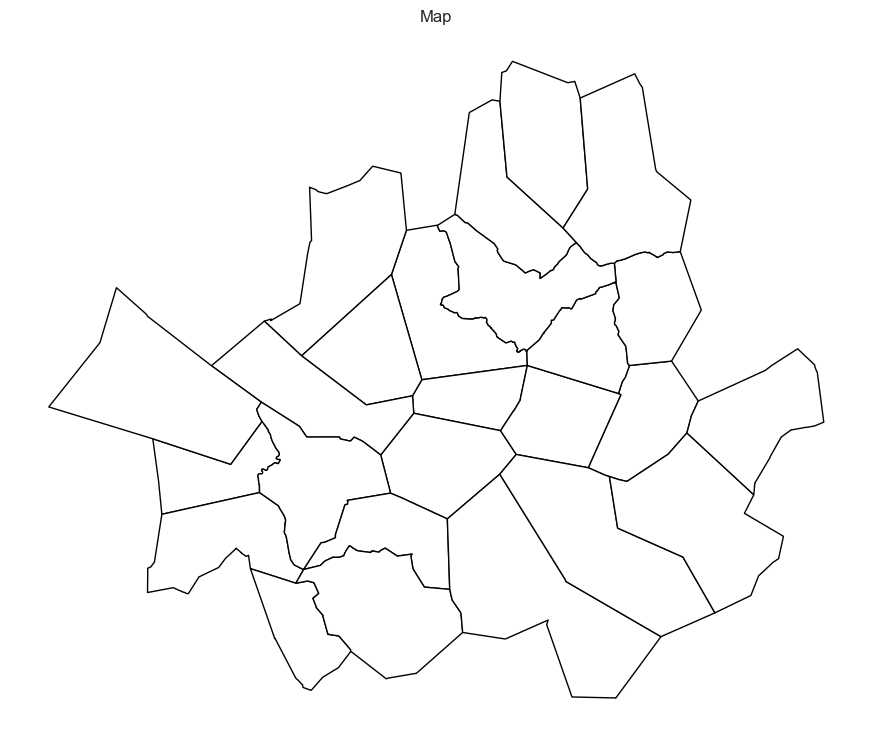

In [169]:
import matplotlib.pyplot as plt

ax = seo.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Map")
ax.set_axis_off()
plt.show()

/var/folders/pt/xk6c0b5907z_9txgpjnm7d000000gn/T/ipykernel_92211/1860903829.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seo.geometry = seo.buffer(0.001)


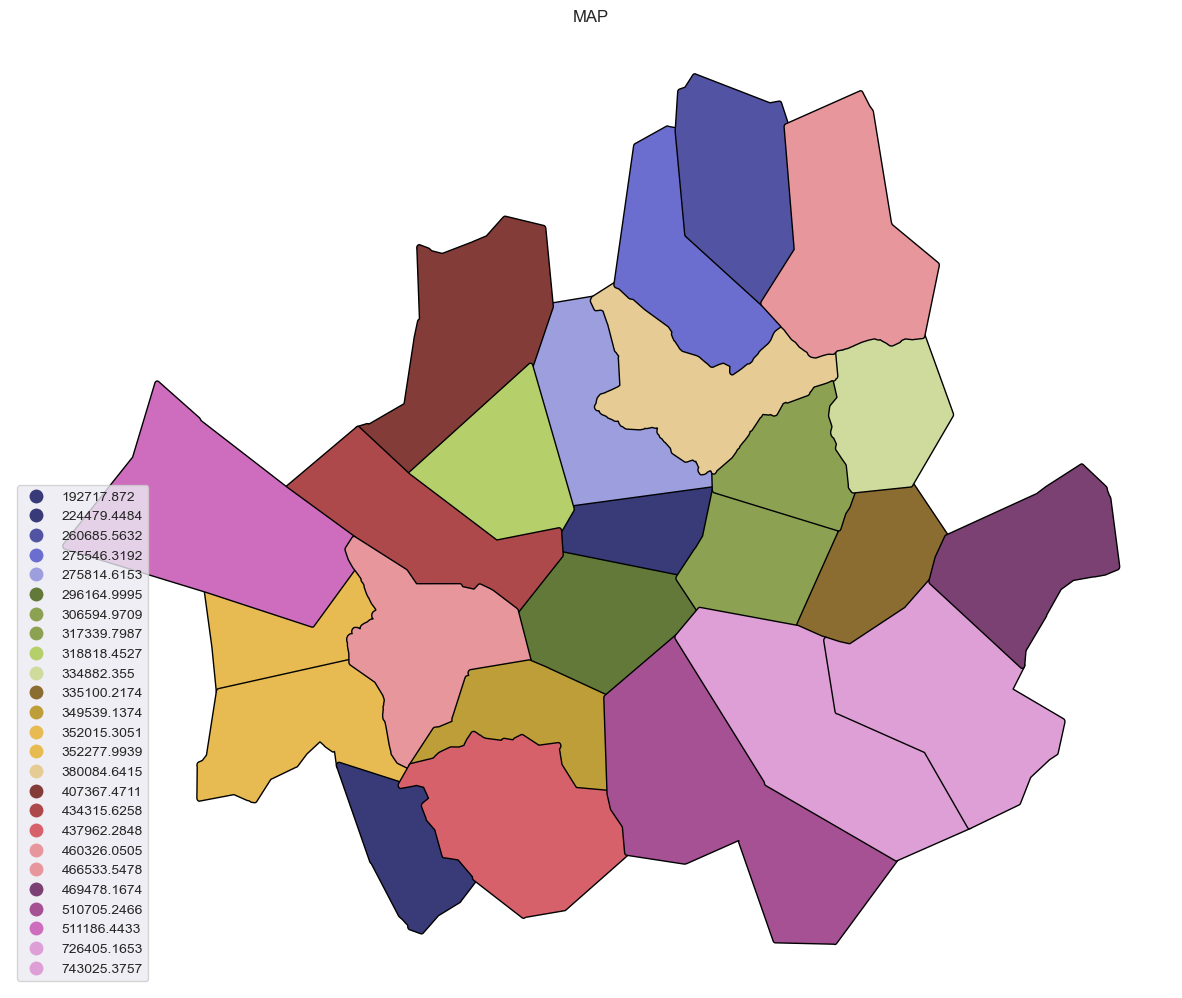

In [170]:
seo = seo.to_crs(epsg=4166) #한국
seo.geometry = seo.buffer(0.001)
seo = seo.dissolve(by='SIG_CD')
ax = seo.plot(figsize=(15, 15), column="총생활인구수", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})

ax.set_title("MAP")
ax.set_axis_off()
plt.show()

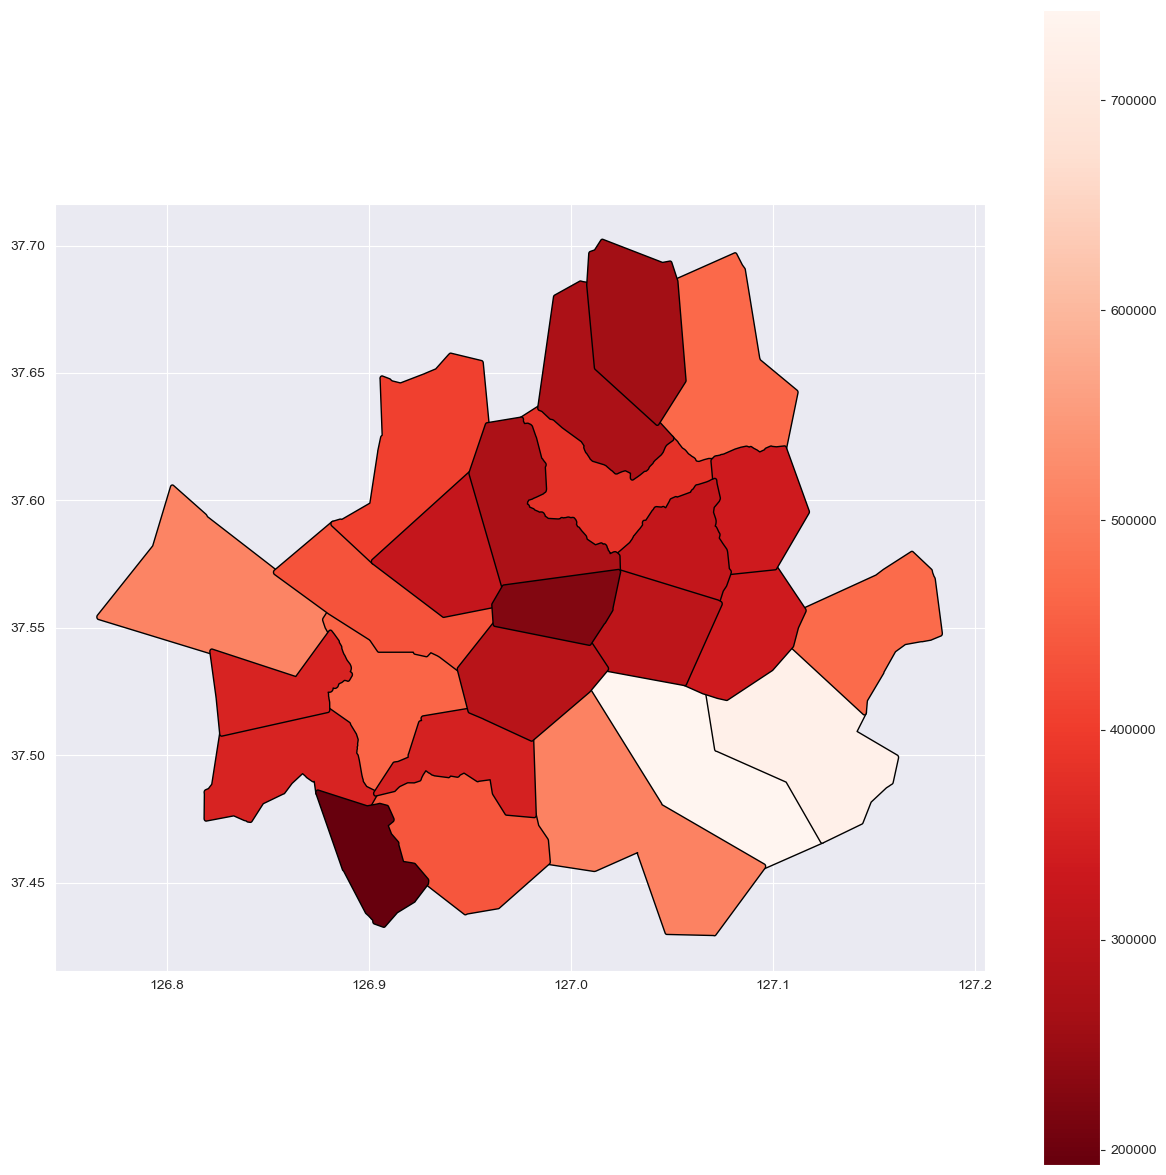

In [174]:
seo = seo.sort_values(by="총생활인구수", ascending=False)

#색상 정의
cmap = plt.get_cmap("Reds")  # 빨간색 스케일
cmap = plt.cm.get_cmap(cmap, 6)  # 색상 범주를 8개
cmap = cmap.reversed()

# 레전드 설정을 업데이트.
# legend_kwds = {'loc': 3, 'title': "총생활인구수"}
ax = seo.plot(figsize=(15, 15), column="총생활인구수", cmap=cmap, edgecolor="k", legend=True)

# # 상위 5개 지역을 빨간색으로 강조.
# top5 = seo.head(5)
# top5.plot(ax=ax, color='blue')

plt.show()

In [185]:
temp = pd.read_csv('S-DoT_NATURE_2023.09.25-10.01.csv', encoding='cp949')
temp = temp.drop(['모델번호','시리얼','지역','행정동'], axis=1)
temp

,측정시간,자치구,초미세먼지 최대(㎍/㎥),초미세먼지 평균(㎍/㎥),초미세먼지 최소(㎍/㎥),미세먼지 최대(㎍/㎥),미세먼지 평균(㎍/㎥),미세먼지 최소(㎍/㎥),온도 최대(℃),온도 평균(℃),...,암모니아 최대(ppm),암모니아 평균(ppm),암모니아 최소(ppm),황화수소 최대(ppm),황화수소 평균(ppm),황화수소 최소(ppm),오존 최대(ppm),오존 평균(ppm),오존 최소(ppm),등록일시
0,2023-09-25_12:07:00,Jungnang-gu,3.0,0.0,0.0,3.0,0.0,0.0,22.4,22.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
1,2023-09-25_12:07:00,Jungnang-gu,0.0,0.0,0.0,0.0,0.0,0.0,21.0,20.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
2,2023-09-25_12:07:00,Jungnang-gu,0.0,0.0,0.0,0.0,0.0,0.0,21.5,21.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
3,2023-09-25_12:07:00,Jungnang-gu,4.0,1.0,0.0,4.0,1.0,0.0,20.3,20.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
4,2023-09-25_12:07:00,Jung-gu,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147075,2023-10-01_11:07:00,Gangnam-gu,0.0,0.0,0.0,0.0,0.0,0.0,20.3,20.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 23:08:18
147076,2023-10-01_11:07:00,Seocho-gu,1.0,0.0,0.0,1.0,0.0,0.0,14.5,14.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 23:08:18
147077,2023-10-01_11:07:00,Mapo-gu,4.0,3.0,2.0,4.0,3.0,2.0,19.0,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 23:08:18
147078,2023-10-01_11:07:00,Gangnam-gu,0.0,0.0,0.0,0.0,0.0,0.0,20.4,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 23:08:18


In [193]:
sep25 = []
cnt=0
for x in temp['측정시간']:
    if x.split('_')[0] =='2023-09-25':
        sep25.append(cnt)
    cnt+=1

sep_25 = temp.iloc[sep25,:].reset_index()
sep_25

,index,측정시간,자치구,초미세먼지 최대(㎍/㎥),초미세먼지 평균(㎍/㎥),초미세먼지 최소(㎍/㎥),미세먼지 최대(㎍/㎥),미세먼지 평균(㎍/㎥),미세먼지 최소(㎍/㎥),온도 최대(℃),...,암모니아 최대(ppm),암모니아 평균(ppm),암모니아 최소(ppm),황화수소 최대(ppm),황화수소 평균(ppm),황화수소 최소(ppm),오존 최대(ppm),오존 평균(ppm),오존 최소(ppm),등록일시
0,0,2023-09-25_12:07:00,Jungnang-gu,3.0,0.0,0.0,3.0,0.0,0.0,22.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
1,1,2023-09-25_12:07:00,Jungnang-gu,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
2,2,2023-09-25_12:07:00,Jungnang-gu,0.0,0.0,0.0,0.0,0.0,0.0,21.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
3,3,2023-09-25_12:07:00,Jungnang-gu,4.0,1.0,0.0,4.0,1.0,0.0,20.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
4,4,2023-09-25_12:07:00,Jung-gu,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 00:07:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22166,22166,2023-09-25_11:07:00,Mapo-gu,4.0,3.0,1.0,4.0,3.0,1.0,22.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 23:08:20
22167,22167,2023-09-25_11:07:00,Dongjak-gu,5.0,4.0,3.0,9.0,8.0,6.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 23:08:21
22168,22168,2023-09-25_11:07:00,Dongjak-gu,1.0,0.0,0.0,1.0,0.0,0.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 23:08:21
22169,22169,2023-09-25_11:07:00,Mapo-gu,0.0,0.0,0.0,0.0,0.0,0.0,21.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-25 23:08:21


In [ ]:
sep_25.